In [1]:
import torch
import torch.nn.functional as F

In [2]:
torch.nn.Softmax(dim=0)(torch.tensor([1,2]).float())

tensor([0.2689, 0.7311])

In [3]:
with open("names.txt", "r") as f:
    words = f.read().splitlines()
    
words[:3]

['emma', 'olivia', 'ava']

In [4]:
max((len(w), w) for w in words), min((len(w), w) for w in words)

((15, 'muhammadmustafa'), (2, 'aj'))

In [5]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi["."] = 0
itos = {i:s for s,i in stoi.items()}

In [34]:
N = torch.ones((27, 27), dtype=torch.int32)

In [35]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

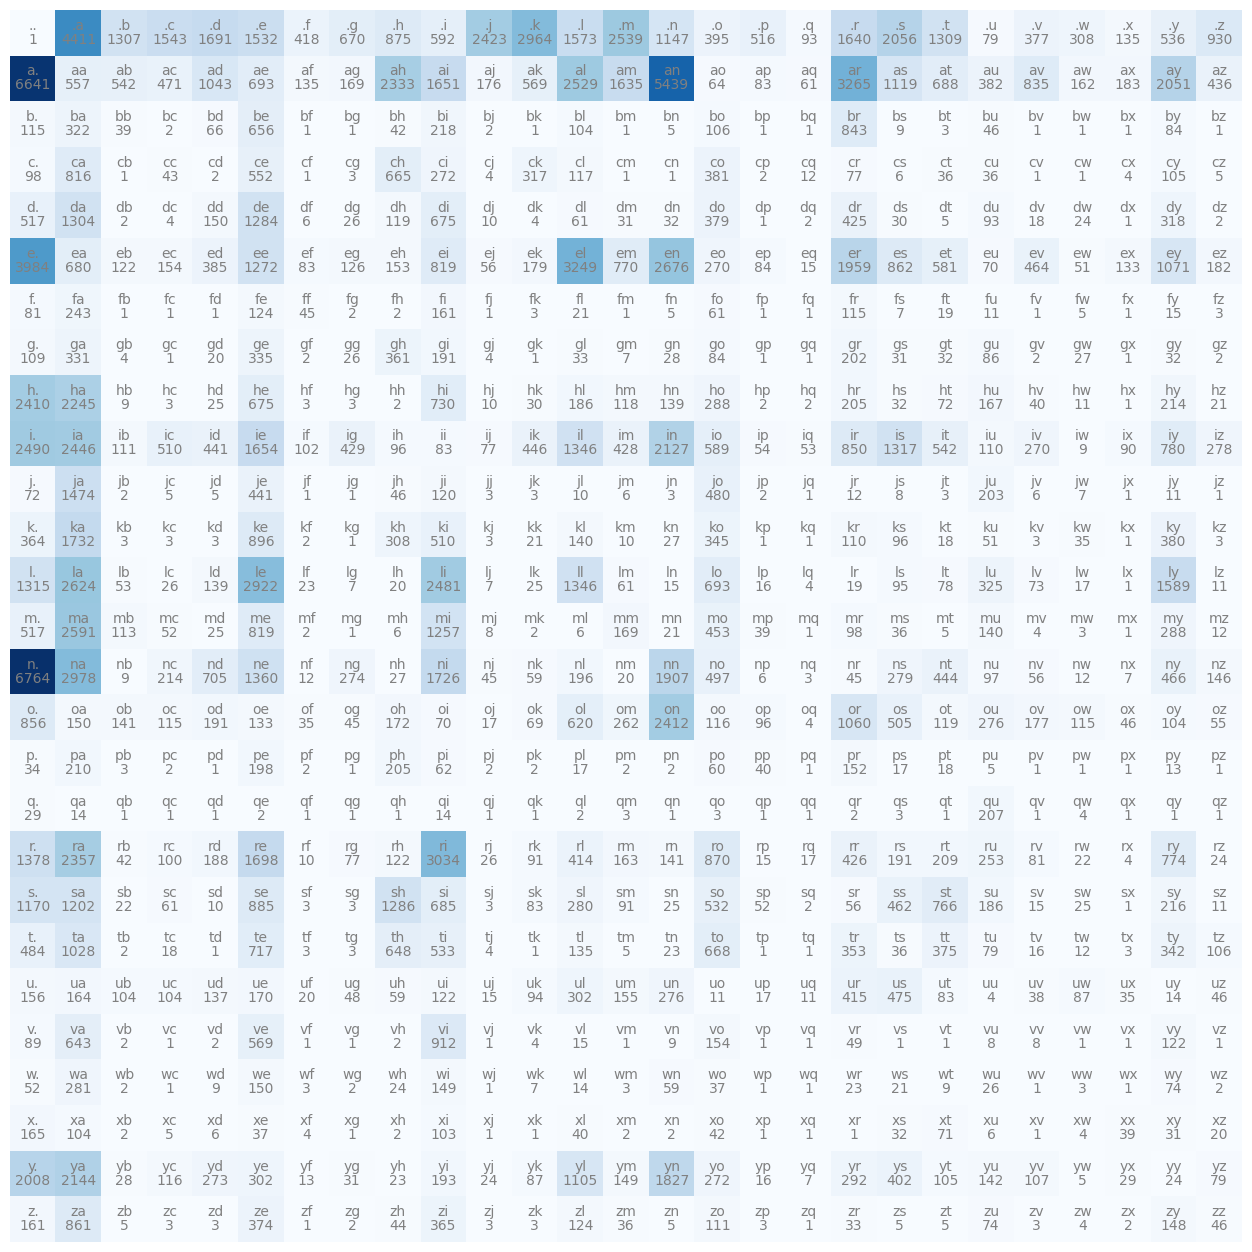

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [39]:
P = N.float()
P /= P.sum(1, keepdim=True)
P[0].sum()

tensor(1.)

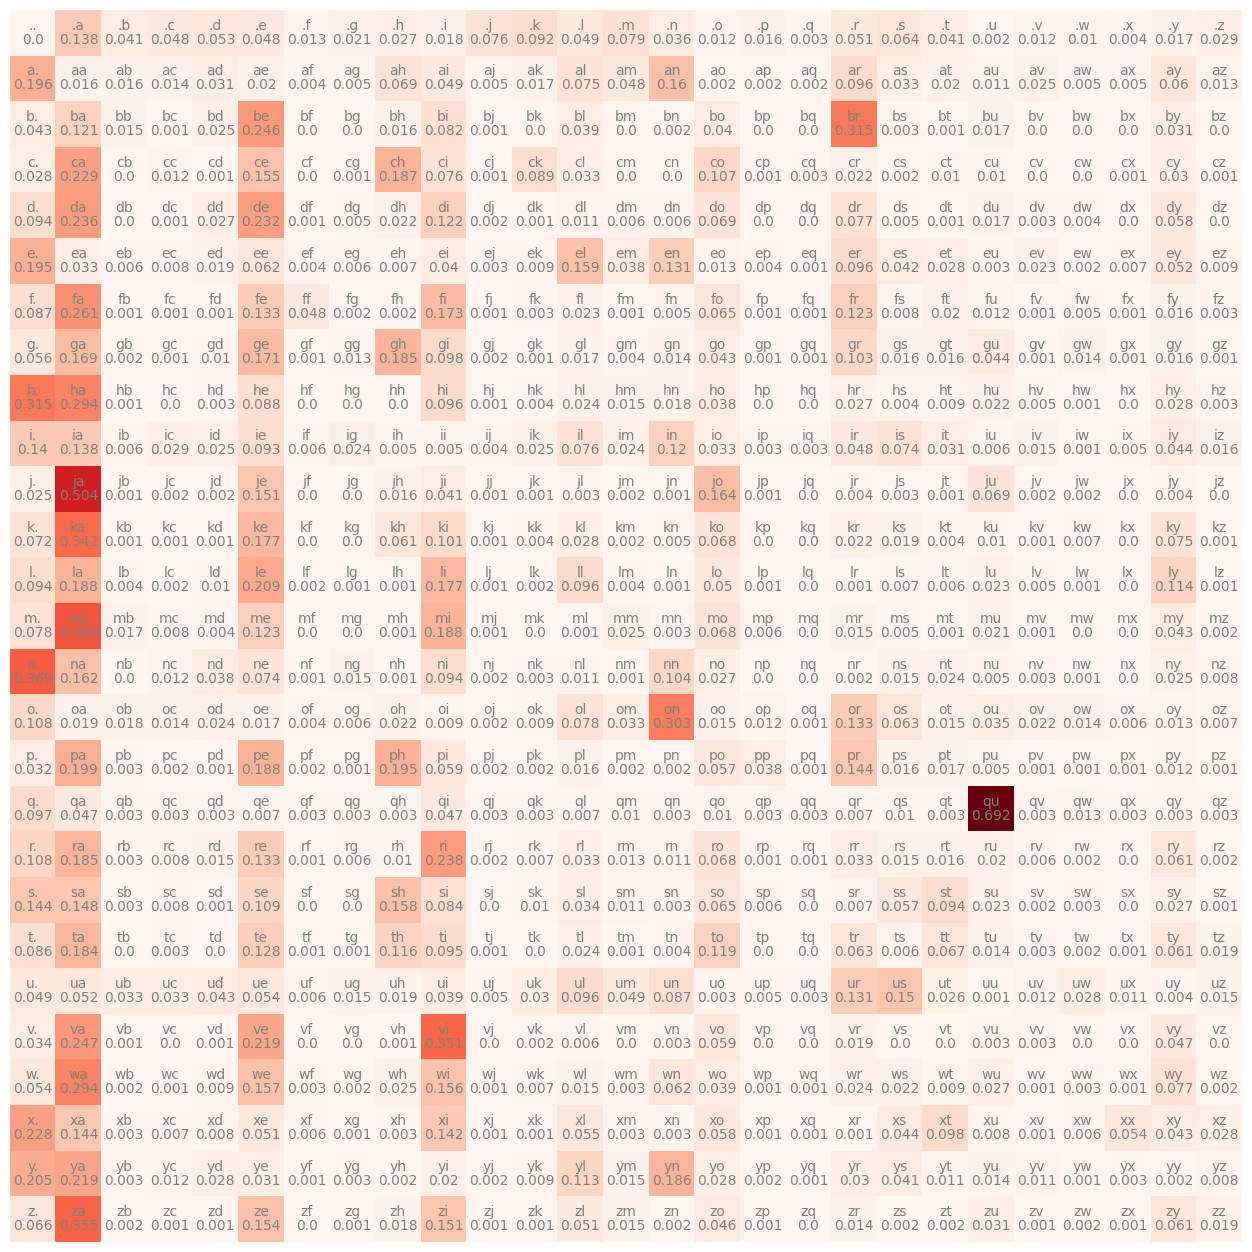

In [40]:
plt.figure(figsize=(16,16))
plt.imshow(P, cmap='Reds')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, round(P[i, j].item(),3), ha="center", va="top", color='gray')
plt.axis('off');

In [108]:
def calc_nll(word):
    logprob = 0
    n = 0
    for w in [word]:
        chs = ['.'] + list(w) + ['.']
        for ch1, ch2 in zip(chs, chs[1:]):
            ix1 = stoi[ch1]
            ix2 = stoi[ch2]
            prob = P[ix1, ix2]
            logprob += torch.log(prob)
            n += 1
            print(f"{ch1, ch2}, prob={prob.item():.4f}")
        print(f"nll = {- logprob/n}")
        return -logprob.item()/n

In [121]:
calc_nll("niyar")

('.', 'n'), prob=0.0358
('n', 'i'), prob=0.0940
('i', 'y'), prob=0.0440
('y', 'a'), prob=0.2187
('a', 'r'), prob=0.0963
('r', '.'), prob=0.1083
nll = 2.4836206436157227


2.4836206436157227